### Loading data binaries

In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/vanderbilt/")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
from src.io.LoadBinary import perpl_LoadBinary

In [4]:
filepath = "/home/vinicius/funcog/vanderbilt/vanderbilt/neural_data/pHPC_cnct.dat"

#### Plot load binary function docstring

In [5]:
perpl_LoadBinary?

Signature:
perpl_LoadBinary(
    filename: str,
    frequency: int = 30000,
    start: float = 0,
    duration: float = None,
    offset: int = 0,
    nSamplesPerChannel: int = None,
    nChannels: int = 1,
    channels: list = None,
    precision: type = <class 'numpy.int16'>,
    downsample: int = None,
    bitVolts: float = 0.195,
    verbose: bool = False,
) -> xarray.core.dataarray.DataArray
Docstring:
Load data binaries and apply the appropriate parameters.

Parameters
----------
filename: str
    Name of the file to be read.
frequency: int | 20 kHz
    Sampling rate in Hertz.
start: float | 0
    Position to start reading in seconds.
duration: float | None
    Duration to read in seconds. If None takes whole duration.
offset: int | 0
    Position to start reading (in samples per channel.
nSamplesPerChannel: int | None
    Number of samples (per channel) to read. If None read all.
nChannels: int | 1
    Number of data channels in the file.
channels: array_like | None
    Channels

#### Load data

In [6]:
n = 1000

In [28]:
data = perpl_LoadBinary(
    filepath,
    frequency=30000,
    nSamplesPerChannel=10000,
    channels=None,
    downsample=1,
    bitVolts=0.195,
    nChannels=64,
    precision=np.int16,
)

In [29]:
from mne.filter import filter_data

In [30]:
data = filter_data(data.data.T, sfreq=30000, l_freq=5, h_freq=1000, n_jobs=20).T

Setting up band-pass filter from 5 - 1e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 1000.00 Hz
- Upper transition bandwidth: 250.00 Hz (-6 dB cutoff frequency: 1125.00 Hz)
- Filter length: 49501 samples (1.650 s)



/tmp/ipykernel_3823467/820322720.py:1: RuntimeWarning: filter_length (49501) is longer than the signal (10000), distortion is likely. Reduce filter length or filter a longer signal.
  data = filter_data(data.data.T, sfreq=30000, l_freq=5, h_freq=1000, n_jobs=20).T
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  58 out of  64 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  64 out of  64 | elapsed:    1.3s finished


In [31]:
print(data)
print(data.shape)

[[ 1.65868197  1.11121615  1.10048451 ...  3.43616244  3.46108929
   3.57210549]
 [ 8.35358818  8.32983739  7.73097573 ...  6.82214864  7.08309561
   7.13381245]
 [14.89904704 15.35984749 14.22476293 ... 10.1324821  10.66118924
  10.63995508]
 ...
 [ 7.11359477  4.2767389   7.56633294 ...  2.02630706  3.41391992
   6.99156096]
 [ 3.10025984  2.03826254  3.99837803 ...  0.03519294  0.72331916
   2.48590887]
 [-1.02808361 -0.22753568  0.3377204  ... -2.002304   -2.02645665
  -2.11071609]]
(10000, 64)


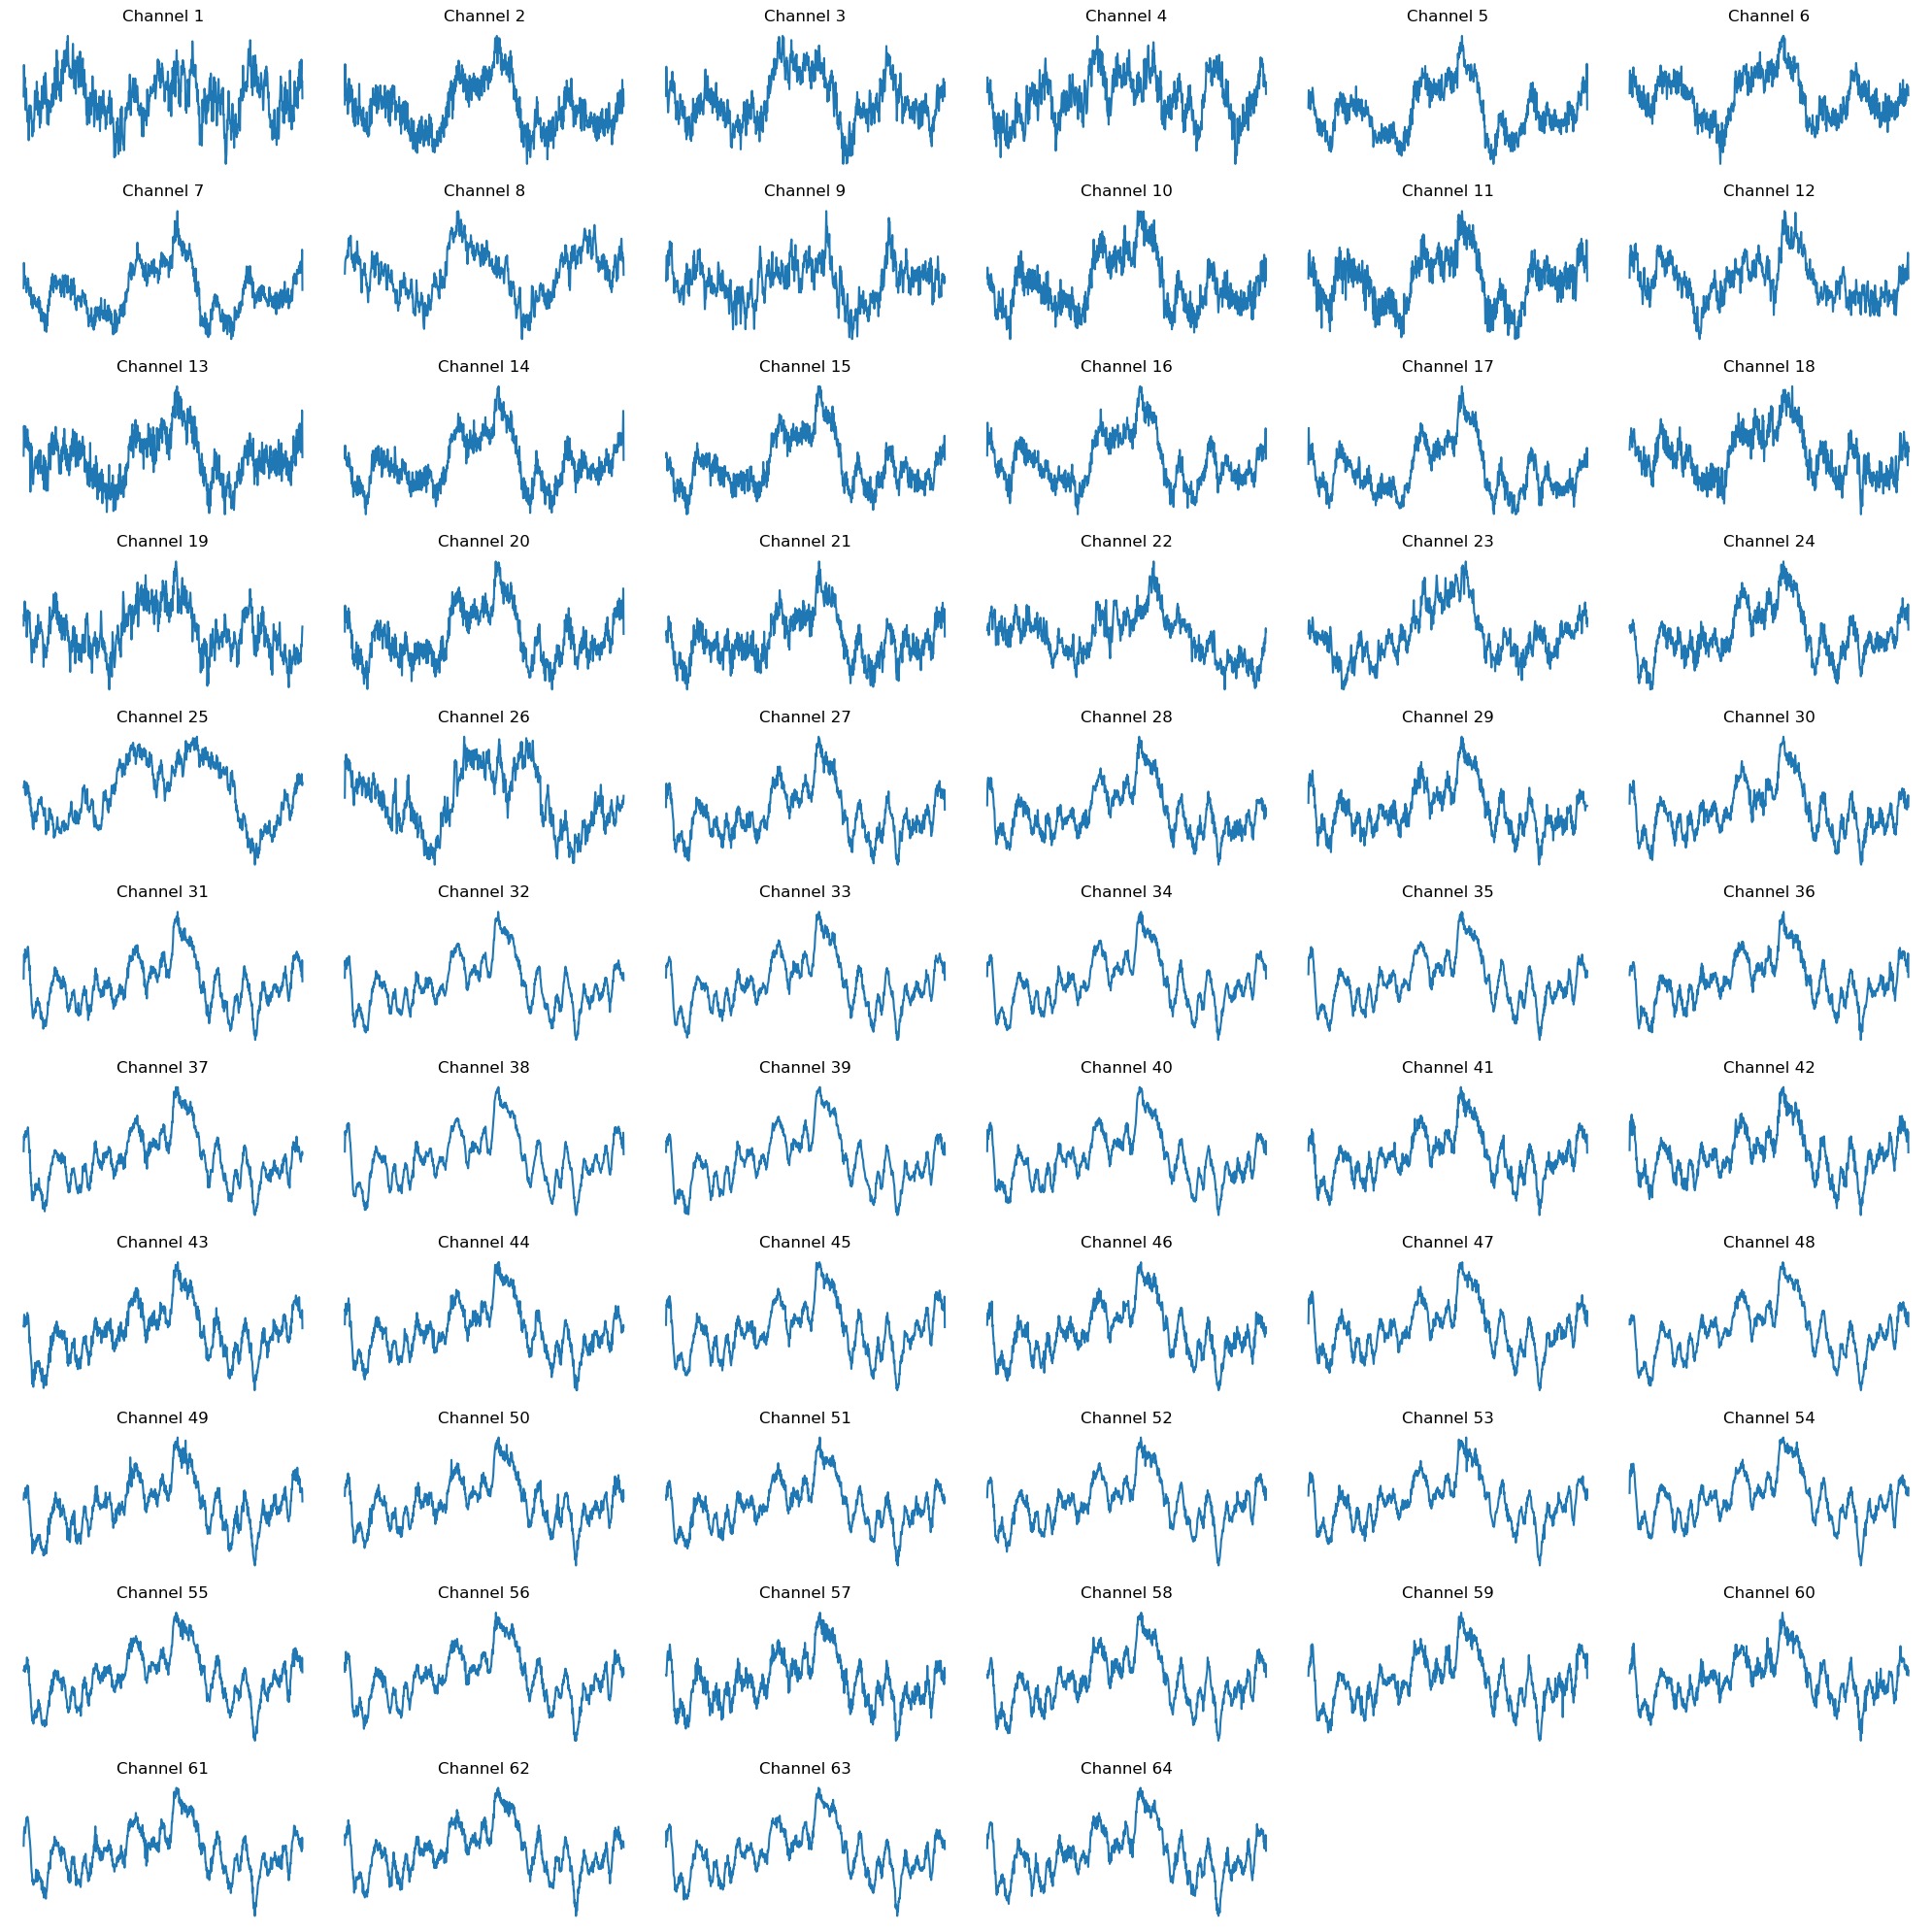

In [32]:
plt.figure(figsize=(20, 20))
for i in range(data.shape[1]):
    plt.subplot(11, 6, i + 1)
    plt.plot(data[:, i])
    plt.title(f"Channel {i + 1}")
    plt.axis("off")
plt.tight_layout()

#### Save data for different parameters to compare with Matlab version

In [8]:
downsample = [1, 10, 20]
channels = [1, 5, 10, 23, 55]

#### Different sample sizes

In [9]:
for n in tqdm([1000, 5000, 10000, 20000]):
    for decim in downsample:
        data = perpl_LoadBinary(
            filepath,
            frequency=30000,
            nSamplesPerChannel=n,
            downsample=decim,
            bitVolts=0.195,
            nChannels=64,
            channels=channels,
        )
        np.savetxt(
            f"/home/vinicius/funcog/vanderbilt/vanderbilt/test_nsamples_{n}_decim_{decim}.txt",
            data,
            delimiter=",",
        )

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.54it/s]


#### Different durations (in seconds)

In [10]:
for n in tqdm([1, 5, 10]):
    for decim in downsample:
        data = perpl_LoadBinary(
            filepath,
            frequency=30000,
            nSamplesPerChannel=None,
            duration=n,
            downsample=decim,
            bitVolts=0.195,
            nChannels=64,
            channels=channels,
        )
        np.savetxt(
            f"/home/vinicius/funcog/vanderbilt/vanderbilt/test_dur_{n}_decim_{decim}.txt",
            data,
            delimiter=",",
        )

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.36s/it]
